# Use Case
- Objective Statement:
  - To get insight into what type gender who churn and no churn.
  - To gain insight into senior citizens who churn and no churn.
  - To gain insight into churn and no churn customers whether the customer has a partner or has dependents.
  - To gain insight into churn and no churn customers based on how long the customer have tenure.
  - To gain insight into churn and no churn customers based on how many customers use Internet Service, Online Security, Multiple Lines, Online Backup, Device Protection, Tech Support, Streaming TV, Movie Streaming, Payment Methods, and Paperless Billing facilities.
  - To get insight about what type based on customer contract churn and no churn.
  - To get insight about how long customers churn, monthly subscription fees, and the total cost they spend on services.
  - To get insight about customer churn analysis.
  - To create modeling with Machine Learning to predict customer churn.

- Challenges:
  - There are some variables containing many missing values
  - There are some inappropriate data types
  - There is multicolinerity on some variables

- Methodology / Analytic Technique:
  - Descriptive analysis
  - Graph analysis
  - Modelling using Logistic Regression
  
- Business Benefit:
  - Helping Business Development Team to create product differentiation based on the characteristic for each customer.
  - Know how to treat customers with spesific criteria, especially between churn customers and no churn customers.

- Expected Outcome:
  - Know how many customers based on gender type who churn and no churn.
  - Know how many customers based on senior citizens who churn and no churn.
  - Know how many customers based on churn and no churn customers whether the customer has a partner or has dependents.
  - Know how many churn customers and no churn customers based on how long the customers have tenure.
  - Know how many customers based on churn and no churn customers based on how many customers use Internet Service, Online Security, Multiple Lines, Online Backup, Device Protection, Tech Support, Streaming TV, Movie Streaming, Payment Methods, and Paperless Billing facilities.
  - Know how many customers based on type customer contract churn and no churn.
  - Know how long customers churn, monthly subscription fees, and the total cost they spend on services.
  - Know customer churn analysis.
  - Create modeling with Machine Learning to predict customers churn.
  
# Business Understanding
- Data telco is a company engaged in telecommunication and internet services to make easier for consumers to communicate remotely and surf the internet more easily with offers several services such as time contracts, and various types of services.
- This case has some business question using the data:
  - How many customers based on gender type who churn and no churn?
  - How many customers based on senior citizens who churn and no churn?
  - How many customers based on churn and no churn customers whether the customer has a partner or has dependents?
  - How many churn customers and no churn customers based on how long the customers have tenure?
  - How many churn and no churn customers based on how many customers use Internet Service, Online Security, Multiple Lines, Online Backup, Device Protection, Tech Support, Streaming TV, Movie Streaming, Payment Methods, and Paperless Billing facilities?
  - How many customers based on type customer contract churn and no churn?
  - How long customers subscribe, monthly subscription fees, and the total cost they spend on services?
  - How about customer churn analysis?
  - How to create modeling with Machine Learning to predict customers churn?

# Data Understanding
- Data of Telecom Customer with 21 columns and 7043 rows
- Source Code : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- Data Dictionary :  
  - customerId : Customer number uniquely assigned to each customer.
  - gender : gender of customer
  - SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
  - partner : Whether the customer has a partner or not (Yes, No)
  - Dependets : Whether the customer has dependents or not (Yes, No)
  - tenure : Number of months the customer has stayed with the company
  - PhoneService : Whether the customer has a phone service or not (Yes, No)
  - MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
  - InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
  - OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
  - OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
  - DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
  - TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
  - StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
  - StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
  - Contract : The contract term of the customer (Month-to-month, One year, Two year)
  - PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
  - PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
  - MonthlyCharges : The amount charged to the customer monthly
  - TotalCharges : The total amount charged to the customer
  - Churn : The customer churn status (1 - Yes, 0 - No) 

# Data Preparation
- Code Used:
  - Python Version: 3.7.15
  - Packages: Pandas, Numpy, Matplotlib, Seaborn, Sklearn, and Warnings

# Data Profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, log_loss
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [225]:
df = pd.read_csv('data_telco.csv')

In [226]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,NaN,NaN,NaN,1,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,NaN,NaN,NaN,NaN,34,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,NaN,NaN,NaN,NaN,45,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,NaN,NaN,NaN,NaN,2,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            6034 non-null   object 
 2   SeniorCitizen     6034 non-null   float64
 3   Partner           6034 non-null   object 
 4   Dependents        6034 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     6034 non-null   object 
 8   InternetService   6034 non-null   object 
 9   OnlineSecurity    6034 non-null   object 
 10  OnlineBackup      6034 non-null   object 
 11  DeviceProtection  6034 non-null   object 
 12  TechSupport       6034 non-null   object 
 13  StreamingTV       6034 non-null   object 
 14  StreamingMovies   6034 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [228]:
df.isna().sum()

customerID             0
gender              1009
SeniorCitizen       1009
Partner             1009
Dependents          1009
tenure                 0
PhoneService           0
MultipleLines       1009
InternetService     1009
OnlineSecurity      1009
OnlineBackup        1009
DeviceProtection    1009
TechSupport         1009
StreamingTV         1009
StreamingMovies     1009
Contract               0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64

# Data Cleansing

In [229]:
# handling missing value

In [230]:
df['InternetService'] = df.InternetService.fillna("unknown")
df['InternetService'].value_counts()

Fiber optic    2621
DSL            2092
No             1321
unknown        1009
Name: InternetService, dtype: int64

In [231]:
df['gender'] = df.gender.fillna("unknown")
df['gender'].value_counts()

Male       3041
Female     2993
unknown    1009
Name: gender, dtype: int64

In [232]:
df['SeniorCitizen'] = df.SeniorCitizen.fillna("unknown")
df['SeniorCitizen'].value_counts()

0.0        5057
unknown    1009
1.0         977
Name: SeniorCitizen, dtype: int64

In [233]:
df['Partner'] = df.Partner.fillna("unknown")
df['Partner'].value_counts()

No         3111
Yes        2923
unknown    1009
Name: Partner, dtype: int64

In [234]:
df['Dependents'] = df.Dependents.fillna("unknown")
df['Dependents'].value_counts()

No         4238
Yes        1796
unknown    1009
Name: Dependents, dtype: int64

In [235]:
df['MultipleLines'] = df.MultipleLines.fillna("unknown")
df['MultipleLines'].value_counts()

No                  2908
Yes                 2537
unknown             1009
No phone service     589
Name: MultipleLines, dtype: int64

In [236]:
df['OnlineSecurity'] = df.OnlineSecurity.fillna("unknown")
df['OnlineSecurity'].value_counts()

No                     2993
Yes                    1720
No internet service    1321
unknown                1009
Name: OnlineSecurity, dtype: int64

In [237]:
df['OnlineBackup'] = df.OnlineBackup.fillna("unknown")
df['OnlineBackup'].value_counts()

No                     2643
Yes                    2070
No internet service    1321
unknown                1009
Name: OnlineBackup, dtype: int64

In [238]:
df['DeviceProtection'] = df.DeviceProtection.fillna("unknown")
df['DeviceProtection'].value_counts()

No                     2643
Yes                    2070
No internet service    1321
unknown                1009
Name: DeviceProtection, dtype: int64

In [239]:
df['TechSupport'] = df.TechSupport.fillna("unknown")
df['TechSupport'].value_counts()

No                     2973
Yes                    1740
No internet service    1321
unknown                1009
Name: TechSupport, dtype: int64

In [240]:
df['StreamingTV'] = df.StreamingTV.fillna("unknown")
df['StreamingTV'].value_counts()

No                     2403
Yes                    2310
No internet service    1321
unknown                1009
Name: StreamingTV, dtype: int64

In [241]:
df['StreamingMovies'] = df.StreamingMovies.fillna("unknown")
df['StreamingMovies'].value_counts()

No                     2394
Yes                    2319
No internet service    1321
unknown                1009
Name: StreamingMovies, dtype: int64

In [242]:
# change data type

In [243]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors="coerce")

In [244]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

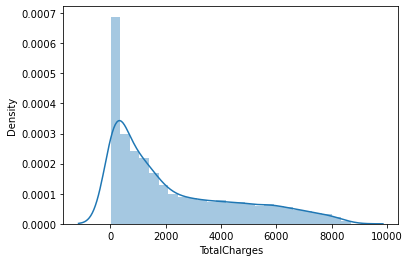

In [245]:
sns.distplot(df['TotalCharges'])

Because Total Charges tend to be possitive skewness, to fill in the missing value using the median

In [246]:
val = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(val)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Exploratory Data Analysis

In [248]:
# Describe

In [249]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


The average length of ownership of customer access is 32.3 with an average monthly charges of 64.8 and the average total charges is 2281.9

In [250]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

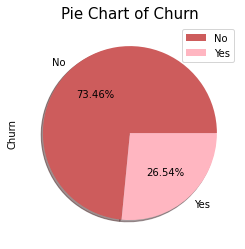

In [251]:
Type = df['Churn'].value_counts()
Type.plot.pie(autopct='%.2f%%', shadow = True, colors = ('#CD5C5C', '#FFB6C1'), legend = True)
plt.title('Pie Chart of Churn', fontsize = 15)
plt.show()

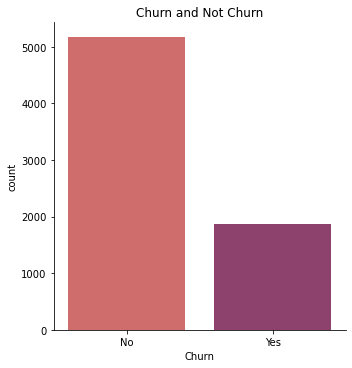

In [252]:
sns.catplot(x="Churn", kind="count", data=df, palette='flare')
plt.title('Churn and Not Churn');

There are more customers who do not unsubscribe than those who unsubscribe. There are 5174 customers who did not unsubscribe and those who unsubscribed as many as 1869.

In [253]:
def make_pivot(param1, param2):     
    df_slice = df[[param1, param2]]     
    slice_pivot = df_slice.pivot_table(index=[param1], columns=[param2], \
                                       aggfunc=np.size,fill_value=0)     
    return slice_pivot     

gender  Female  Male  unknown
Churn                        
No        4374  4478     1496
Yes       1612  1604      522


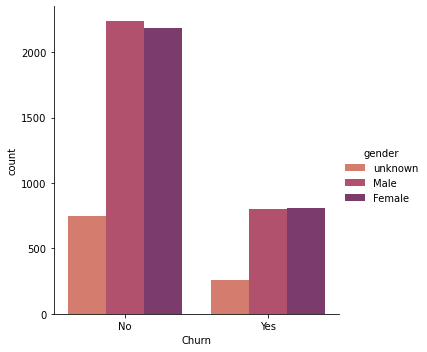

In [254]:
print(make_pivot('Churn','gender'))
sns.catplot(x="Churn", kind="count", hue="gender", data=df, palette='flare')

- There are customers data of unknown gender
- More male customers than female customers
- More male customers who do not unsubscribe than those who unsubscribe
- More female customers do not unsubscribe than those who unsubscribe
- There are also more customers whose gender is unknown than those who unsubscribe

In [255]:
dftest = df[['Churn', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]
dftest1 = dftest.query("Churn == 'No'")
dftest2 = dftest.query("Churn != 'No'")

In [256]:
# SeniorCitizen still Subscribe (No Churn)
dftest1['SeniorCitizen'].value_counts()

0.0        3860
unknown     748
1.0         566
Name: SeniorCitizen, dtype: int64

In [257]:
# SeniorCitizen stop Subscribe (Churn)
dftest2['SeniorCitizen'].value_counts()

0.0        1197
1.0         411
unknown     261
Name: SeniorCitizen, dtype: int64

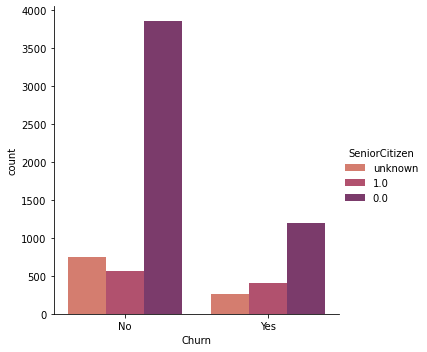

In [258]:
sns.catplot(x="Churn", kind="count", hue="SeniorCitizen", data=df, palette='flare')

From the customers who still subscribe, the most are those who are not senior citizens. Likewise, of the customers who unsubscribed, the most were those who were not senior citizens.

InternetService   DSL  Fiber optic    No  unknown
Churn                                            
No               3382         3024  2446     1496
Yes               802         2218   196      522


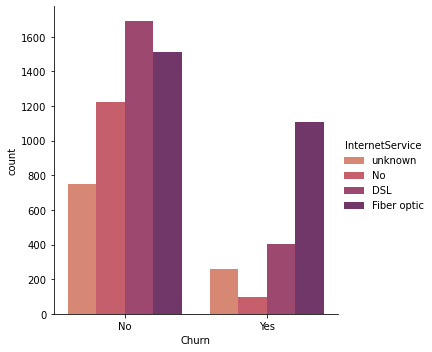

In [259]:
print(make_pivot('Churn','InternetService'))
sns.catplot(x="Churn", kind="count", hue="InternetService", data=df, palette='flare')

- Customers who use DSL internet services and still subscribe to the most among other internet services
- More customers who use Fiber Optic internet services are still subscribed than unsubscribed
- More customers who do not use internet services are still subscribed than unsubscribed
- More customers whose internet service is not known are still subscribed than unsubscribed
- For subscribers who are still subscribed, most use DSL internet service, while at least the type of service is unknown
- For customers who unsubscribe the most use Fiber Optic internet services, while at least do not use internet services

PaperlessBilling    No   Yes
Churn                       
No                4806  5542
Yes                938  2800


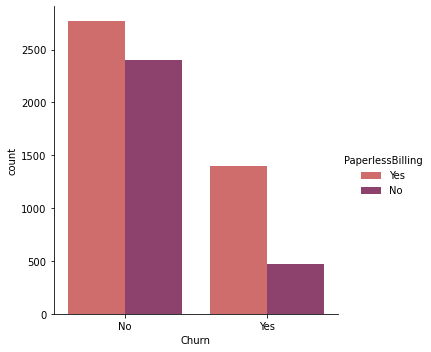

In [260]:
print(make_pivot('Churn','PaperlessBilling'))
sns.catplot(x="Churn", kind="count", hue="PaperlessBilling", data=df, palette='flare')

- Customers who are still subscribed use more electronic transactions (paperless billing) than do not use electronic transactions (paperless billing)
- Customers who stop subscribing are also more likely to use electronic transactions than those who do not use electronic transactions

Dependents    No   Yes  unknown
Churn                          
No          5824  3028     1496
Yes         2652   564      522


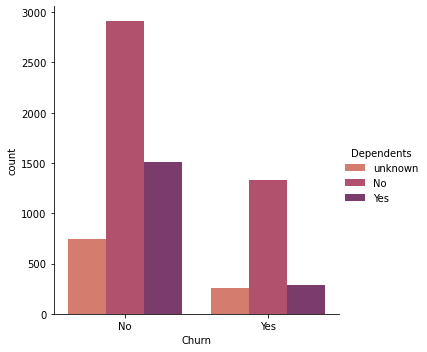

In [261]:
print(make_pivot('Churn','Dependents'))
sns.catplot(x="Churn", kind="count", hue="Dependents", data=df, palette='flare')

- Of the customers who are still subscribed, the most are customers who have no dependents
- Of the customers who unsubscribe, the most are customers who have no dependents
- Of the customers who still have dependents, more are customers who are still subscribed

Partner    No   Yes  unknown
Churn                       
No       4158  4694     1496
Yes      2064  1152      522


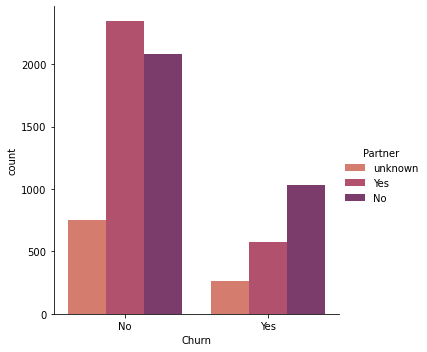

In [262]:
print(make_pivot('Churn','Partner'))
sns.catplot(x="Churn", kind="count", hue="Partner", data=df, palette='flare')

- Of the customers who are still subscribed, the most are customers who have a partner
- Of the customers who unsubscribe, the most are customers who do not have a partner
- Customers who are not known to have the most partners are still subscribed

PhoneService    No   Yes
Churn                   
No            1024  9324
Yes            340  3398


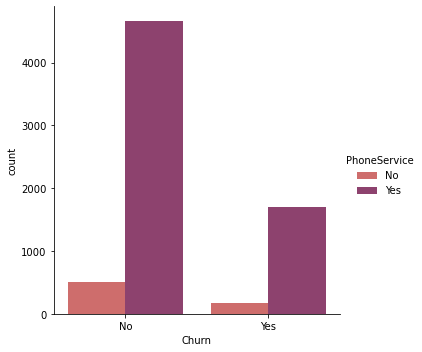

In [263]:
print(make_pivot('Churn','PhoneService'))
sns.catplot(x="Churn", kind="count", hue="PhoneService", data=df, palette='flare')

- More subscribers who are still subscribed use telephone service than those who do not use telephone service
- Customers who unsubscribe are also more likely to use telephone services than those who do not

MultipleLines    No  No phone service   Yes  unknown
Churn                                               
No             4368               884  3600     1496
Yes            1448               294  1474      522


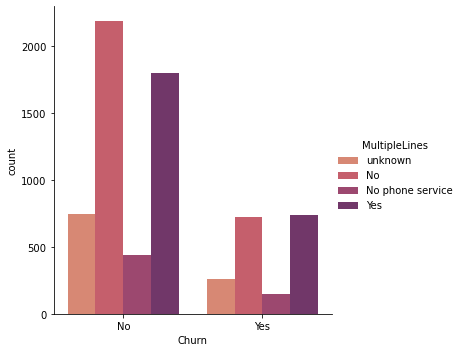

In [264]:
print(make_pivot('Churn','MultipleLines'))
sns.catplot(x="Churn", kind="count", hue="MultipleLines", data=df, palette='flare')

- Most subscribers who are still subscribed do not use Multiple Lines
- Most unsubscribed customers use Multiple Lines

OnlineSecurity    No  No internet service   Yes  unknown
Churn                                                   
No              3468                 2446  2938     1496
Yes             2518                  196   502      522


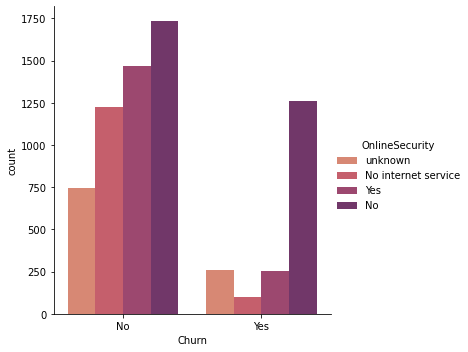

In [265]:
print(make_pivot('Churn','OnlineSecurity'))
sns.catplot(x="Churn", kind="count", hue="OnlineSecurity", data=df, palette='flare')

- Most subscribers who still have no online protection/security
- Customers who unsubscribe are also the most without online protection/security

OnlineBackup    No  No internet service   Yes  unknown
Churn                                                 
No            3152                 2446  3254     1496
Yes           2134                  196   886      522


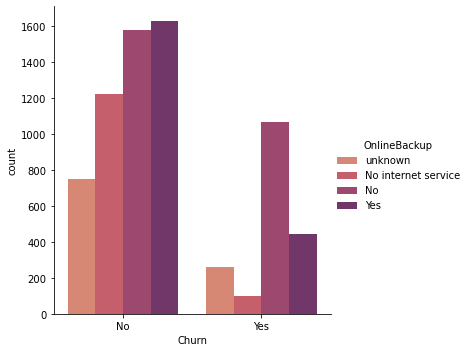

In [266]:
print(make_pivot('Churn','OnlineBackup'))
sns.catplot(x="Churn", kind="count", hue="OnlineBackup", data=df, palette='flare')

- Most subscribers who still have online backup
- Customers who unsubscribe are the most without online backup

DeviceProtection    No  No internet service   Yes  unknown
Churn                                                     
No                3200                 2446  3206     1496
Yes               2086                  196   934      522


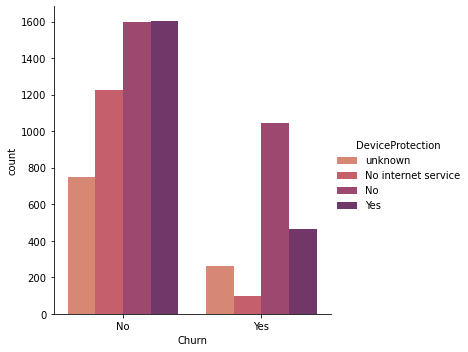

In [267]:
print(make_pivot('Churn','DeviceProtection'))
sns.catplot(x="Churn", kind="count", hue="DeviceProtection", data=df, palette='flare')

- Most subscribers who still have device protection
- Customers who unsubscribe are the most without device protection

TechSupport    No  No internet service   Yes  unknown
Churn                                                
No           3476                 2446  2930     1496
Yes          2470                  196   550      522


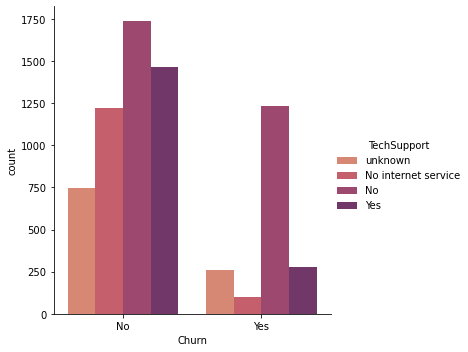

In [268]:
print(make_pivot('Churn','TechSupport'))
sns.catplot(x="Churn", kind="count", hue="TechSupport", data=df, palette='flare')

- Most of the customers who are still subscribed do not have technology/technical support
- Most of the unsubscribed customers do not have technology/technical support

StreamingTV    No  No internet service   Yes  unknown
Churn                                                
No           3202                 2446  3204     1496
Yes          1604                  196  1416      522


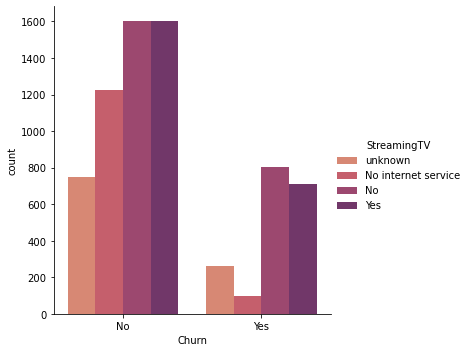

In [269]:
print(make_pivot('Churn','StreamingTV'))
sns.catplot(x="Churn", kind="count", hue="StreamingTV", data=df, palette='flare')

- Most subscribers who are still subscribed have access to Streaming TV
- But the number is almost the same as those who do not have access to Streaming TV
- Most unsubscribed subscribers do not have access to Streaming TV

StreamingMovies    No  No internet service   Yes  unknown
Churn                                                    
No               3162                 2446  3244     1496
Yes              1626                  196  1394      522


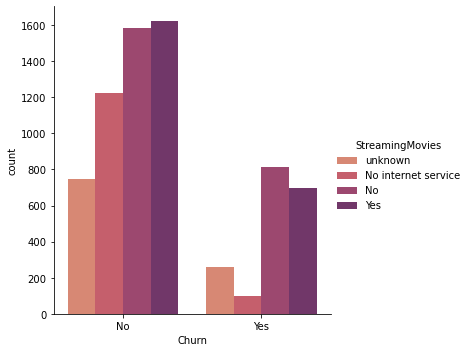

In [270]:
print(make_pivot('Churn','StreamingMovies'))
sns.catplot(x="Churn", kind="count", hue="StreamingMovies", data=df, palette='flare')

- Most subscribers who are still subscribed have access to Streaming Movies
- Most unsubscribed subscribers do not have access to Streaming Movies

Contract  Month-to-month  One year  Two year
Churn                                       
No                  4440      2614      3294
Yes                 3310       332        96


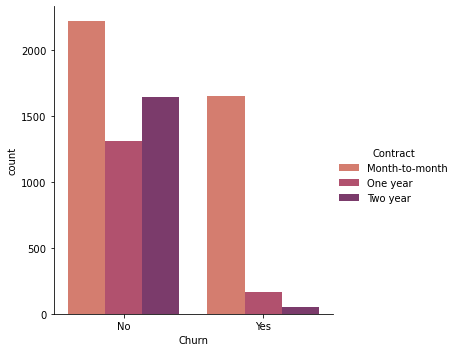

In [271]:
print(make_pivot('Churn','Contract'))
sns.catplot(x="Churn", kind="count", hue="Contract", data=df, palette='flare')

- Customers who are still subscribed have more monthly contracts
- Customers who unsubscribe also have more monthly contracts

PaymentMethod  Bank transfer (automatic)  Credit card (automatic)  \
Churn                                                               
No                                  2572                     2580   
Yes                                  516                      464   

PaymentMethod  Electronic check  Mailed check  
Churn                                          
No                         2588          2608  
Yes                        2142           616  


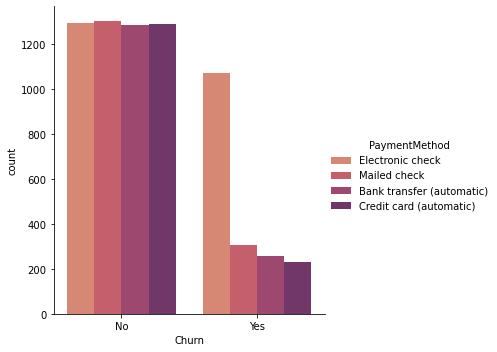

In [272]:
print(make_pivot('Churn','PaymentMethod'))
sns.catplot(x="Churn", kind="count", hue="PaymentMethod", data=df, palette='flare')

- Customers who are still subscribed mostly use the Mailed Check payment method
- Customers who unsubscribe mostly use the Electronic Check payment method
- From customers who are still subscribed, use a payment method tends to be similiar.
- But for unsubscribed customers, the payment methods tend to be different due to non-existent differences between the methods and others

<AxesSubplot:xlabel='tenure', ylabel='Density'>

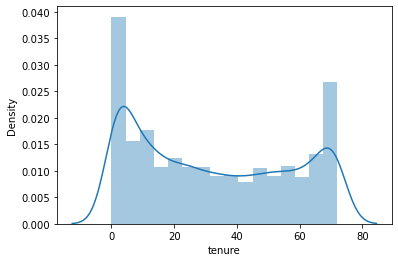

In [273]:
sns.distplot(df['tenure'])

In [274]:
dftest1.describe()

,tenure,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000
mean,37.569965,61.265124,2552.882494
std,24.113777,31.092648,2327.590132
min,0.000000,18.250000,18.800000
25%,15.000000,25.100000,579.575000
50%,38.000000,64.425000,1679.525000
75%,61.000000,88.400000,4262.850000
max,72.000000,118.750000,8672.450000


In [275]:
dftest2.describe()

,tenure,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094
std,19.531123,24.666053,1890.822994
min,1.000000,18.850000,18.850000
25%,2.000000,56.150000,134.500000
50%,10.000000,79.650000,703.550000
75%,29.000000,94.200000,2331.300000
max,72.000000,118.350000,8684.800000


In [276]:
print('Modus No Churn: ', dftest1['tenure'].mode().values[0])
print('Modus Churn: ', dftest2['tenure'].mode().values[0])

Modus No Churn:  72
Modus Churn:  1


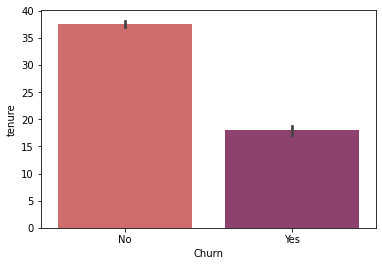

In [277]:
sns.barplot(x='Churn', y='tenure', data=df, palette='flare');

Ownership of customers who are still subscribed longer than customers who unsubscribe.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

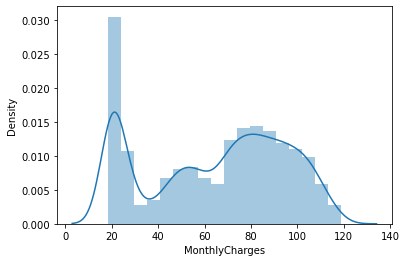

In [278]:
sns.distplot(df['MonthlyCharges'])

In [279]:
print('Modus No Churn: ', dftest1['MonthlyCharges'].mode().values[0])
print('Modus Churn: ', dftest2['MonthlyCharges'].mode().values[0])

Modus No Churn:  20.05
Modus Churn:  74.4


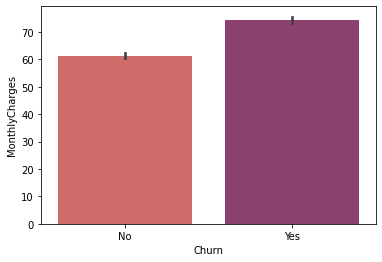

In [280]:
sns.barplot(x='Churn', y='MonthlyCharges', data=df, palette='flare');

The monthly costs incurred by customers who unsubscribe are more than customers who are still subscribed.

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

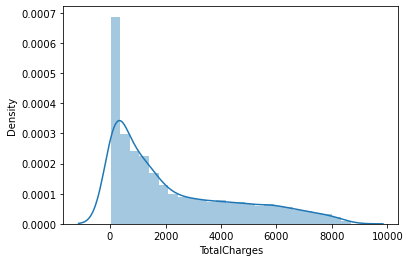

In [281]:
sns.distplot(df['TotalCharges'])

In [282]:
print('Modus No Churn: ', dftest1['TotalCharges'].mode().values[0])
print('Modus Churn: ', dftest2['TotalCharges'].mode().values[0])

Modus No Churn:  1397.475
Modus Churn:  20.2


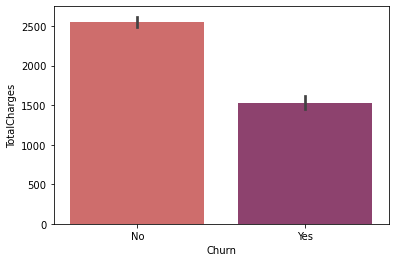

In [283]:
sns.barplot(x='Churn', y='TotalCharges', data=df, palette='flare');

The total costs incurred by customers who are still subscribed are more than the total costs of customers who unsubscribe.

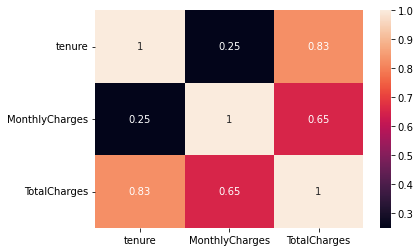

In [284]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(), annot=True);

- There is a multicollinearity between tenure with Total Charges and Monthly Charges with Total Charges.
- Then it must be removed one of the variables from the three variables above before modeling.

# Feature Enginerring

In [285]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,unknown,unknown,unknown,unknown,1,No,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,unknown,unknown,unknown,unknown,34,Yes,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,unknown,unknown,unknown,unknown,2,Yes,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,unknown,unknown,unknown,unknown,45,No,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,unknown,unknown,unknown,unknown,2,Yes,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [286]:
PaymentMethod = pd.get_dummies(df['PaymentMethod'], prefix='PaymentMethod', drop_first=False)
Gender = pd.get_dummies(df['gender'], prefix='gender', drop_first=False)
InternetService = pd.get_dummies(df['InternetService'], prefix='InternetService', drop_first=False)
OnlineSecurity = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity', drop_first=False)
OnlineBackup = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup', drop_first=False)
MultipleLines = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines', drop_first=False)
DeviceProtection = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection', drop_first=False)
TechSupport = pd.get_dummies(df['TechSupport'], prefix='TechSupport', drop_first=False)
StreamingTV = pd.get_dummies(df['StreamingTV'], prefix='StreamingTV', drop_first=False)
StreamingMovies= pd.get_dummies(df['StreamingMovies'], prefix='StreamingMoviess', drop_first=False)
Partner= pd.get_dummies(df['Partner'], prefix='Partner', drop_first=False)
PhoneService = pd.get_dummies(df['PhoneService'], prefix='PhoneService', drop_first=False)
PaperlessBilling = pd.get_dummies(df['PaperlessBilling'], prefix='PaperlessBilling', drop_first=False)
Dependents = pd.get_dummies(df['Dependents'], prefix='Dependents', drop_first=False)
SeniorCitizen = pd.get_dummies(df['SeniorCitizen'], prefix='SeniorCitizen', drop_first=False)

In [287]:
df = pd.concat([df, PaymentMethod], axis=1)
df = pd.concat([df, Gender], axis=1)
df = pd.concat([df, InternetService], axis=1)
df = pd.concat([df, OnlineSecurity], axis=1)
df = pd.concat([df, MultipleLines ], axis=1)
df = pd.concat([df, DeviceProtection], axis=1)
df = pd.concat([df, TechSupport], axis=1)
df = pd.concat([df, StreamingTV], axis=1)
df = pd.concat([df, StreamingMovies], axis=1)
df = pd.concat([df, Partner], axis=1)
df = pd.concat([df, PhoneService], axis=1)
df = pd.concat([df, PaperlessBilling], axis=1)
df = pd.concat([df, Dependents ], axis=1)
df = pd.concat([df, OnlineBackup ], axis=1)
df = pd.concat([df, SeniorCitizen ], axis=1)

In [288]:
df.drop(['PaymentMethod'], axis=1, inplace=True)
df.drop(['gender'], axis=1, inplace=True)
df.drop(['InternetService'], axis=1, inplace=True)
df.drop(['OnlineSecurity'], axis=1, inplace=True)
df.drop(['MultipleLines'], axis=1, inplace=True)
df.drop(['DeviceProtection'], axis=1, inplace=True)
df.drop(['TechSupport'], axis=1, inplace=True)
df.drop(['StreamingTV'], axis=1, inplace=True)
df.drop(['StreamingMovies'], axis=1, inplace=True)
df.drop(['Partner'], axis=1, inplace=True)
df.drop(['PhoneService'], axis=1, inplace=True)
df.drop(['PaperlessBilling'], axis=1, inplace=True)
df.drop(['Dependents'], axis=1, inplace=True)
df.drop(['OnlineBackup'], axis=1, inplace=True)
df.drop(['SeniorCitizen'], axis=1, inplace=True)
df.head()

,customerID,tenure,Contract,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Dependents_No,Dependents_Yes,Dependents_unknown,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineBackup_unknown,SeniorCitizen_0.0,SeniorCitizen_1.0,SeniorCitizen_unknown
0,7590-VHVEG,1,Month-to-month,29.85,29.85,No,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,5575-GNVDE,34,One year,56.95,1889.50,No,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
2,3668-QPYBK,2,Month-to-month,53.85,108.15,Yes,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,7795-CFOCW,45,One year,42.30,1840.75,No,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,9237-HQITU,2,Month-to-month,70.70,151.65,Yes,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [289]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [290]:
df['Contract'] = df['Contract'].map({"Month-to-month":0, "Two year":1, "One year":2})

In [291]:
df['Contract'].value_counts()

0    3875
1    1695
2    1473
Name: Contract, dtype: int64

In [292]:
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})

<AxesSubplot:xlabel='tenure', ylabel='Density'>

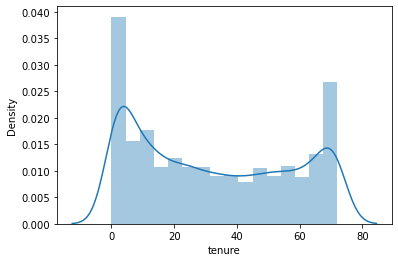

In [293]:
sns.distplot(df['tenure'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

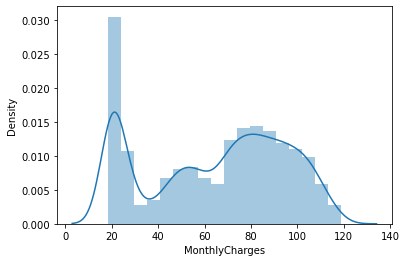

In [294]:
sns.distplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

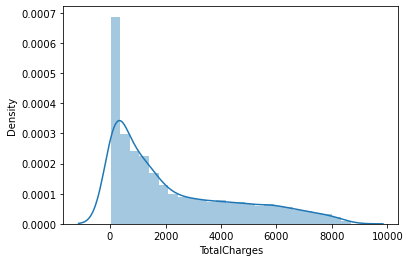

In [295]:
sns.distplot(df['TotalCharges'])

In [296]:
scaler = StandardScaler()
df['tenure'] = scaler.fit_transform(df[['tenure']])
df['MonthlyCharges'] = scaler.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = scaler.fit_transform(df[['TotalCharges']])
df['Contract'] = scaler.fit_transform(df[['Contract']])
df.head()

,customerID,tenure,Contract,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,Dependents_No,Dependents_Yes,Dependents_unknown,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,OnlineBackup_unknown,SeniorCitizen_0.0,SeniorCitizen_1.0,SeniorCitizen_unknown
0,7590-VHVEG,-1.277445,-0.821752,-1.160323,-0.994242,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,5575-GNVDE,0.066327,1.672366,-0.259629,-0.173244,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
2,3668-QPYBK,-1.236724,-0.821752,-0.362660,-0.959674,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
3,7795-CFOCW,0.514251,1.672366,-0.746535,-0.194766,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,9237-HQITU,-1.236724,-0.821752,0.197365,-0.940470,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,1


# Preprocessing Modeling

- Feature Selection

In [297]:
df.drop('customerID', axis=1, inplace = True) #identifier
df.drop('TotalCharges', axis=1, inplace = True) #multicolinier

- Feature Importance

In [298]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

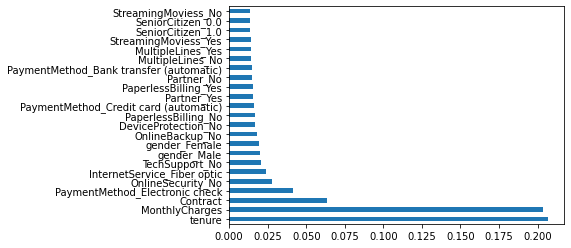

In [299]:
model = ExtraTreesClassifier()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind = 'barh')
plt.show()

- Train Test Split

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

# Modeling

In [301]:
model = LogisticRegression()

In [302]:
model.fit(X_train, y_train)

LogisticRegression()

In [303]:
y_pred = model.predict(X_test)

# Evaluate Model

              precision    recall  f1-score   support

   not_Churn       0.86      0.91      0.88      1036
       Churn       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



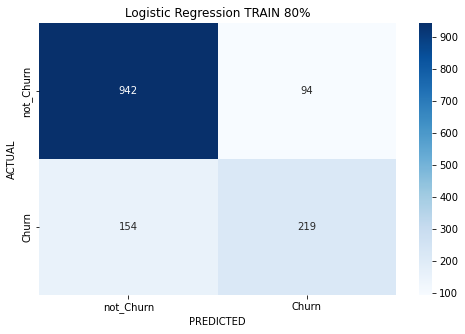

In [304]:
cm_model = confusion_matrix(y_test, y_pred)

labels = ['not_Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()


# Is the model overfit or underfit

In [305]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [306]:
# Accuracy score of training data
print(accuracy_score(y_train, y_pred_train))

0.7999645012424565


In [307]:
# Accuracy score of testing data
print(accuracy_score(y_test, y_pred_test))

0.8239886444286728


# AUC / ROC

In [308]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_proba_train = model.predict_proba(X_train)[:,1]
y_proba_test = model.predict_proba(X_test)[:,1]
cm_train = confusion_matrix(y_train,y_pred_train)
cm_test = confusion_matrix(y_test,y_pred_test)

In [309]:
fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

In [310]:
# True Positive
tp_train, tp_test = cm_train[1][1], cm_test[1][1]
# True Negative
tn_train, tn_test = cm_train[0][0], cm_test[0][0]
# False Positive
fp_train, fp_test = cm_train[1][0], cm_test[1][0]
# False Negative
fn_train, fn_test = cm_train[0][1], cm_test[0][1]


Train Confusion Matrix
[[3729  409]
 [ 718  778]]
Test Confusion Matrix
[[942  94]
 [154 219]]

Area Under Curve
AUC train & test        : 83.53% & 85.99%

Confusion Matrix Evaluation
Accuracy train & test   : 80.00% & 82.40%
Recall train & test     : 52.01% & 58.71%
Specificity train & test: 90.12% & 90.93%
Precision train & test  : 65.54% & 69.97%
F1 Score train & test   : 57.99% & 63.85%
Log Loss train & test   : 6.909 & 6.0793


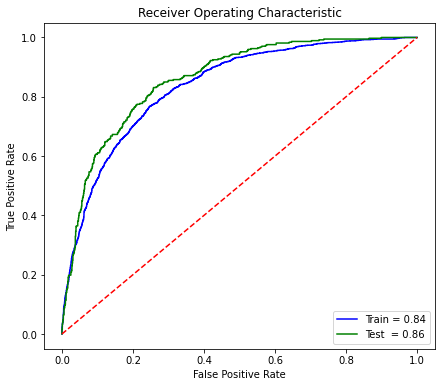

In [311]:
# Overall, how often is the classifier correct?
accuracy_train, accuracy_test = ((tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train)), (
            (tp_test + tn_test) / (tp_test + tn_test + fp_test + fn_test))
# When it's actually yes, how often does it predict yes?
recall_train, recall_test = (tp_train / (tp_train + fp_train)), (tp_test / (tp_test + fp_test))
# When it's actually no, how often does it predict no?
specificity_train, specificity_test = (tn_train / (tn_train + fn_train)), (tn_test / (tn_test + fn_test))
# When it predicts yes, how often is it correct?
precision_train, precision_test = (tp_train / (tp_train + fn_train)), (tp_test / (tp_test + fn_test))
# F1 Score
f1_score_train, f1_score_test = (2 * (precision_train * recall_train) / (precision_train + recall_train)), (
            2 * (precision_test * recall_test) / (precision_test + recall_test))

# Print all the evaluation metrics
print('\nTrain Confusion Matrix')
print(cm_train)
print('Test Confusion Matrix')
print(cm_test)
print('\nArea Under Curve')
print('AUC train & test        : %.2f%%' % (roc_auc_train * 100), '&', '%.2f%%' % (roc_auc_test * 100))
print('\nConfusion Matrix Evaluation')
print('Accuracy train & test   : %.2f%%' % (accuracy_train * 100), '&', '%.2f%%' % (accuracy_test * 100))
print('Recall train & test     : %.2f%%' % (recall_train * 100), '&', '%.2f%%' % (recall_test * 100))
print('Specificity train & test: %.2f%%' % (specificity_train * 100), '&', '%.2f%%' % (specificity_test * 100))
print('Precision train & test  : %.2f%%' % (precision_train * 100), '&', '%.2f%%' % (precision_test * 100))
print('F1 Score train & test   : %.2f%%' % (f1_score_train * 100), '&', '%.2f%%' % (f1_score_test * 100))
print('Log Loss train & test   :', round(log_loss(y_train, y_pred_train), 4), '&',
          round(log_loss(y_test, y_pred_test), 4))

#create plot of ROC_AUC
plt.figure(figsize=(7, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_train, tpr_train, 'b', label='Train = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'g', label='Test  = %0.2f' % roc_auc_test)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Building a Model With Cross Validation

In [312]:
regressor = LogisticRegression()

In [313]:
scores = cross_val_score(regressor, X_train, y_train, scoring = 'accuracy', cv=3)
scores

array([0.79392971, 0.80031949, 0.80244941])

# Hyperparameter Tuning in Logistic Regression

In [314]:
regressor.get_params()
parameters = {"penalty": ['l1', 'l2', 'elasticnet', 'none'],
              "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              "n_jobs": [None, -1],
              "max_iter": [10, 100, 1000]
             }

In [315]:
grid = GridSearchCV(estimator = regressor, param_grid = parameters, cv=3)

In [316]:
best_model = grid.fit(X_train, y_train)

In [317]:
best_model.best_params_

{'max_iter': 10, 'n_jobs': None, 'penalty': 'l2', 'solver': 'saga'}

In [318]:
regres_new = LogisticRegression(max_iter= 10, n_jobs= None, penalty = 'l2', solver= 'saga')

In [319]:
model_new = regres_new.fit(X_train, y_train)

In [320]:
y_pred_new = regres_new.predict(X_test)

# Evaluate Model

              precision    recall  f1-score   support

   not_Churn       0.86      0.91      0.88      1036
       Churn       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



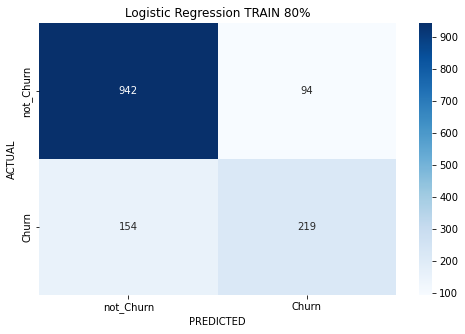

In [211]:
cm_model = confusion_matrix(y_test, y_pred_new)

labels = ['not_Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

# Oversampling with SMOTE

In [214]:
# Oversampling with SMOTE

X_train_sm, y_train_sm = SMOTE(random_state = False).fit_resample(X_train, y_train)

# Model oversampled

model_sm = LogisticRegression()
model_sm.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [215]:
# Predic using Logistic Regression oversampled

y_pred_sm = model_sm.predict(X_test)

In [216]:
# Evaluate Model

              precision    recall  f1-score   support

   not_Churn       0.86      0.91      0.88      1036
       Churn       0.70      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409



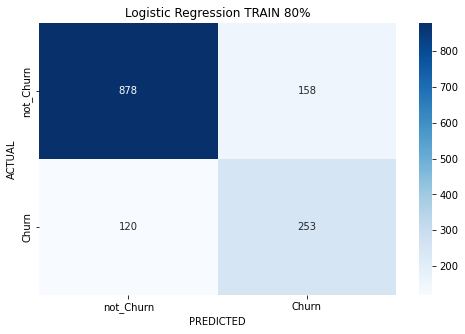

In [217]:
cm_model = confusion_matrix(y_test, y_pred_sm)

labels = ['not_Churn', 'Churn']

print(classification_report(y_test, y_pred, target_names = labels))
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(cm_model, annot=True, fmt=".0f", ax=ax, cmap = 'Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression TRAIN 80%')
plt.xlabel('PREDICTED')
plt.ylabel('ACTUAL')
plt.show()

It can be seen that after an evaluation using oversampling with SMOTE, the accuracy value increases, indicating this is good and the model is fit

In [218]:
# Is this model fit or overfit

In [222]:
# Accuracy Before Evaluate
print(accuracy_score(y_test,y_pred))

0.8239886444286728


In [223]:
# Accuracy After Evaluate
print(accuracy_score(y_test,y_pred_new))

0.8239886444286728


# Result
- No Churn customers there are as much as 73.46%, while churn customers there are as much as 26.54%.
- Most churn customers are female who are 11.44%. Male churn customers are as many as 11.39% and 3.71% are churn customers that their gender is not known. While the remaining 73.46% are no churn customers.
- From churn customers, the majority are not seniors, which is as much as 17%. 5.84% other are senior citizens and 3.71% are churn customers who are unknown. While the remaining 73.45% are no churn customers.
- Most of the churn customers are customers who use Fiber Optics internet services are 15.75%. 5.69% DSL users, 3.71% unknown, and 1.39% did not have internet services. While the remaining 73.46% are no churn customers.
- Most churn customers are customers who use electronic transactions (paperless billing) that are 19.88% while 6.66% were not paperless billing users. The remaining 73.46% are no churn customers.
- 18.83% of customers are churn customers and have no dependents. While 4% of them have dependents and 3.71% are not known. While the remaining 73.47% are no churn customers.
- Most churn customers are customers who don't have a partner, that is as much as 14.65% of all numbers customers. 8.18% have a partner and 3.71% are not known. While the remaining 73.46% are no churn customers.
- 24.12% of customers are churn customers and have phone services. while 2.41% were not have phone service. The remaining 73.46% are no churn customers.
- Most churn customers are customers who have multiple lines, that are 10.46% of customers. 10.28% did not have multiple lines, 3.71% of it is unknown, and 2.09% did not have phone services. While the remaining 73.47% are no churn customers.
- Most churn customers are customers who do not have online security, which is 17.88% customers. 3.56% have online security, 3.71% of them are unknown, and 1.39% do not have internet services. The remaining 73.46% are no churn customers.
- Most churn customers are customers who do not have online backup, which is 15.15% customers. 6.29% have online backup, 3.71% of them are unknown, and 1.39% do not have internet services. The remaining 73.46% are no churn customers.
- Most churn customers are customers who have no device protection, which is 14.81% of customers. 6.63% of it have device protection, 3.71% of them are unknown, and 1.39% do not have internet services. The remaining 73.46% are no churn customers.
- Most churn customers are customers who don't have technical support services, that is 17.54% of customers. 3.9% of them have a technical support, 3.71% of them are unknown, and 1.39% do not have internet services. The remaining 73.46% are no churn customers.
- Most churn customers are customers who do not use Streaming TV services, which is 11.39% of customers. 10.05% of it uses streaming TV services, 3.71% of which are unknown, and 1.39% have no internet services. The remaining 73.46% are no churn customers.
- Most churn customers are customers who do not use Streaming Movies service, which is 11.54% of customers. 9.9% of it using Streaming Movies service, 3.71% of it is unknown, and 1.39% have no internet services. The remaining 73.46% are no churn customers.
- Most churn customers are customers who have monthly contracts, that are 23.50% of customers. 2.36% of it had a one-year contract, and 0.68% had a two-year contract. The remaining 73.46% are no churn customers.
- 15.21% of customers are churn customers and use Elektronic Check payments method. 4.37% of them used Mailed check, 3.66% of them use bank transfers, and 3.29% are churn customers and use credit cards. The remaining 73.46% are no churn customers.
- Most churn customers are customers whose tenure is only 1 month with an average is 18 months.
- Most churn customers on average are customers who spend 74.4 per month.
- The average total costs incurred by no churn customers is 1531.8 where it is smaller than a no churn customers.
- After creating modeling with logistics regression, then the evaluation is made using the AUC/ROC. It can be concluded that the resulting model does not overfit because the AUC train is obtained by 83.53% and the test earned by 85.99%, where the difference is no more than 0.05.

# Recommendation
- Recommendation for “Customer Churn" segment:
Focus on increasing customer purchases, such as create marketing campaigns to upsell those currently subscribed to streaming movies and TV services on our other internet services. 
- Recommendation for “Device Protection" segment:
Improve the Device Protection service in order to prevent a large number of customer churn who use that service.
- Recommendation for “Streaming TV" segment:
Improve the Streaming TV service in order to prevent a large number of customer churn who use that service.
- Recommendation for “Streaming Movies" segment:
Improve the Streaming Movies service in order to prevent a large number of customer churn who use that service.
- Recommendation for “Internet Service" segment:
Improve the internet service with fiber optic in order to prevent a large number of customer churn who use the fiber optic.
- Recommendation for “Payment Method" segment:
Maintain service performance with Mailed Check payment method to prevent customers using that payment method from churn and improve service with Electronic Check payment method so that customers who churn do not get more and more
- Recommendation for "Contract" segment:
Reduce the use of month-to-month contracts, because many customers unsubscribe with month-to-month contracts
- Recommendation for "Technical Support" segment:
Have to improve the Technical support service in order to prevent a large number of customer churn who use that service.
- Recommendation for "Partner" segment:
Have to increase the number of partners in the company in order to reduce unsubscribed customers
- Recommendation for "Phone Service" segment:
must improve phone service in order to reduce unsubscribed customers
- Recommendation for "Multiple line Service" segment:
must improve Multiple line service in order to reduce unsubscribed customers